<a href="https://colab.research.google.com/github/Hossam-Osama/Time-series/blob/main/IceCream_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
from IPython.display import display
import os
# ignore warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.1f}'.format
%matplotlib inline
plotsize = (13, 5)
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
register_matplotlib_converters()
from time import time
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

In [ ]:
df = pd.read_csv("/content/ice_cream.csv")
df.columns

Index(['DATE', 'IPN31152N'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       577 non-null    object 
 1   IPN31152N  577 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.1+ KB


In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       577 non-null    datetime64[ns]
 1   IPN31152N  577 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.1 KB


In [ ]:
df.head()

,DATE,IPN31152N
0,1972-01-01,60.0
1,1972-02-01,67.1
2,1972-03-01,74.2
3,1972-04-01,78.1
4,1972-05-01,84.8


In [ ]:
date = np.array(df['DATE'])
IPN31152N = np.array(df['IPN31152N'])

In [ ]:
order_date_monthly = np.array(date, dtype='datetime64[M]')

In [ ]:
order_date_monthly

array(['1972-01', '1972-02', '1972-03', '1972-04', '1972-05', '1972-06',
       '1972-07', '1972-08', '1972-09', '1972-10', '1972-11', '1972-12',
       '1973-01', '1973-02', '1973-03', '1973-04', '1973-05', '1973-06',
       '1973-07', '1973-08', '1973-09', '1973-10', '1973-11', '1973-12',
       '1974-01', '1974-02', '1974-03', '1974-04', '1974-05', '1974-06',
       '1974-07', '1974-08', '1974-09', '1974-10', '1974-11', '1974-12',
       '1975-01', '1975-02', '1975-03', '1975-04', '1975-05', '1975-06',
       '1975-07', '1975-08', '1975-09', '1975-10', '1975-11', '1975-12',
       '1976-01', '1976-02', '1976-03', '1976-04', '1976-05', '1976-06',
       '1976-07', '1976-08', '1976-09', '1976-10', '1976-11', '1976-12',
       '1977-01', '1977-02', '1977-03', '1977-04', '1977-05', '1977-06',
       '1977-07', '1977-08', '1977-09', '1977-10', '1977-11', '1977-12',
       '1978-01', '1978-02', '1978-03', '1978-04', '1978-05', '1978-06',
       '1978-07', '1978-08', '1978-09', '1978-10', 

In [ ]:
np.unique(order_date_monthly)

array(['1972-01', '1972-02', '1972-03', '1972-04', '1972-05', '1972-06',
       '1972-07', '1972-08', '1972-09', '1972-10', '1972-11', '1972-12',
       '1973-01', '1973-02', '1973-03', '1973-04', '1973-05', '1973-06',
       '1973-07', '1973-08', '1973-09', '1973-10', '1973-11', '1973-12',
       '1974-01', '1974-02', '1974-03', '1974-04', '1974-05', '1974-06',
       '1974-07', '1974-08', '1974-09', '1974-10', '1974-11', '1974-12',
       '1975-01', '1975-02', '1975-03', '1975-04', '1975-05', '1975-06',
       '1975-07', '1975-08', '1975-09', '1975-10', '1975-11', '1975-12',
       '1976-01', '1976-02', '1976-03', '1976-04', '1976-05', '1976-06',
       '1976-07', '1976-08', '1976-09', '1976-10', '1976-11', '1976-12',
       '1977-01', '1977-02', '1977-03', '1977-04', '1977-05', '1977-06',
       '1977-07', '1977-08', '1977-09', '1977-10', '1977-11', '1977-12',
       '1978-01', '1978-02', '1978-03', '1978-04', '1978-05', '1978-06',
       '1978-07', '1978-08', '1978-09', '1978-10', 

In [ ]:
order_date_daily= np.array(date, dtype='datetime64[D]')

In [ ]:
order_date_daily

array(['1972-01-01', '1972-02-01', '1972-03-01', '1972-04-01',
       '1972-05-01', '1972-06-01', '1972-07-01', '1972-08-01',
       '1972-09-01', '1972-10-01', '1972-11-01', '1972-12-01',
       '1973-01-01', '1973-02-01', '1973-03-01', '1973-04-01',
       '1973-05-01', '1973-06-01', '1973-07-01', '1973-08-01',
       '1973-09-01', '1973-10-01', '1973-11-01', '1973-12-01',
       '1974-01-01', '1974-02-01', '1974-03-01', '1974-04-01',
       '1974-05-01', '1974-06-01', '1974-07-01', '1974-08-01',
       '1974-09-01', '1974-10-01', '1974-11-01', '1974-12-01',
       '1975-01-01', '1975-02-01', '1975-03-01', '1975-04-01',
       '1975-05-01', '1975-06-01', '1975-07-01', '1975-08-01',
       '1975-09-01', '1975-10-01', '1975-11-01', '1975-12-01',
       '1976-01-01', '1976-02-01', '1976-03-01', '1976-04-01',
       '1976-05-01', '1976-06-01', '1976-07-01', '1976-08-01',
       '1976-09-01', '1976-10-01', '1976-11-01', '1976-12-01',
       '1977-01-01', '1977-02-01', '1977-03-01', '1977-

In [ ]:
len(np.unique(order_date_daily))

577

In [ ]:
len(np.unique(order_date_monthly))

577

# Working with the Pandas DatetimeIndex
Let's return to our Pandas DataFrame object:

In [ ]:
df.set_index('DATE', inplace=True)
# Note that without inplace=True, it will output the results without changing the data

In [ ]:
df.head()

,IPN31152N
DATE,
1972-01-01,60.0
1972-02-01,67.1
1972-03-01,74.2
1972-04-01,78.1
1972-05-01,84.8


In [ ]:
print(df.index.unique())

DatetimeIndex(['1972-01-01', '1972-02-01', '1972-03-01', '1972-04-01',
               '1972-05-01', '1972-06-01', '1972-07-01', '1972-08-01',
               '1972-09-01', '1972-10-01',
               ...
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01'],
              dtype='datetime64[ns]', name='DATE', length=577, freq=None)


In [ ]:
df.index.day

Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype='int32', name='DATE', length=577)

# Standardizing the DatetimeIndex
While data from existing variables may be sufficient, some Time Series applications require that data contain all periods and have a Frequency assigned. We can see above that our data do not have a frequency (freq=None). While the data seem daily, there are many types of possible [frequencies](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases) (business days, weekdays, etc.). If the input data are already standardized, Pandas will infer a Frequency and assign it. Otherwise, we need to ensure there are:
- No duplicate index values
- No missing index values

Setting a Frequency helps ensure the data are standardized and will work in applications, and is also required for functionality like resampling.



To use this index, we need to tell Pandas how to treat missing values. In this case, we want to use zero for days without sales data.

In [ ]:
print('\nUnique dates in our data: ', len(df.index.unique()), 'Days')
our_date_range = df.index.max() - df.index.min()

# Calculate number of days in date range
print('Total days in our date range:', our_date_range.days, 'Days')



Unique dates in our data:  577 Days
Total days in our date range: 17532 Days


In [ ]:
start_date = datetime(1972,1,1)
end_date = datetime(2020,1,1)
lim_df = df[start_date:end_date]

# **No missing values the date move by month not days**

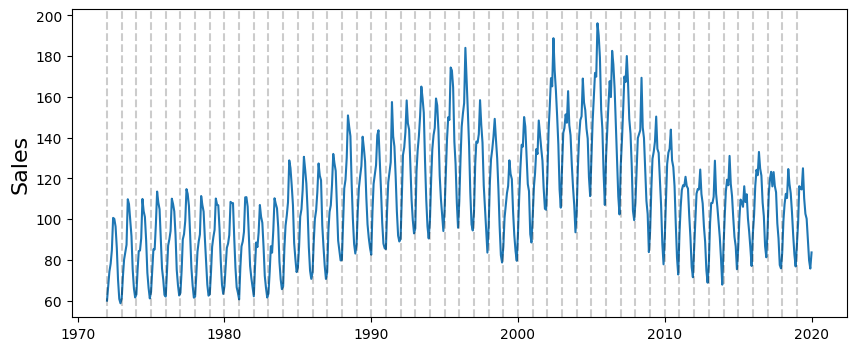

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)


In [ ]:
first_diff = lim_df.diff()[1:]
first_diff

,IPN31152N
DATE,
1972-02-01,7.1
1972-03-01,7.2
1972-04-01,3.9
1972-05-01,6.7
1972-06-01,15.8
...,...
2019-09-01,-2.4
2019-10-01,-10.0
2019-11-01,-10.4


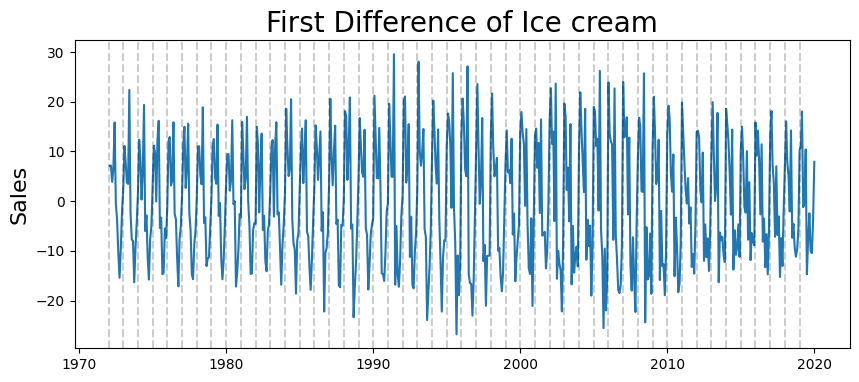

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('First Difference of Ice cream', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

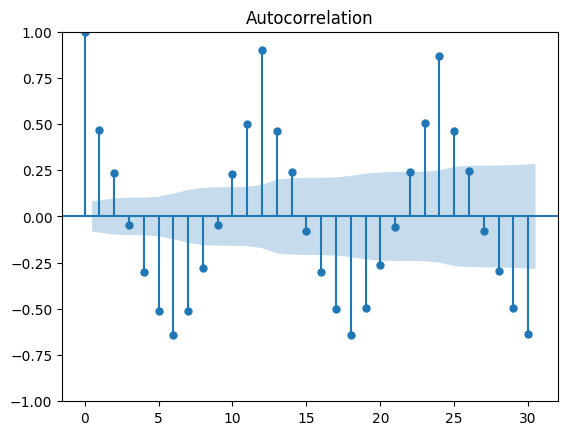

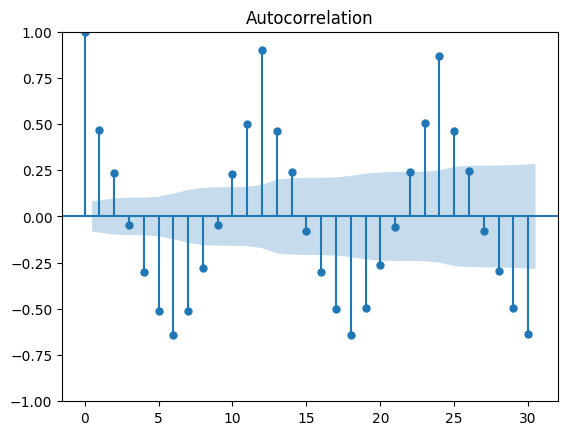

In [ ]:
plot_acf(first_diff, lags=30, title='Autocorrelation')

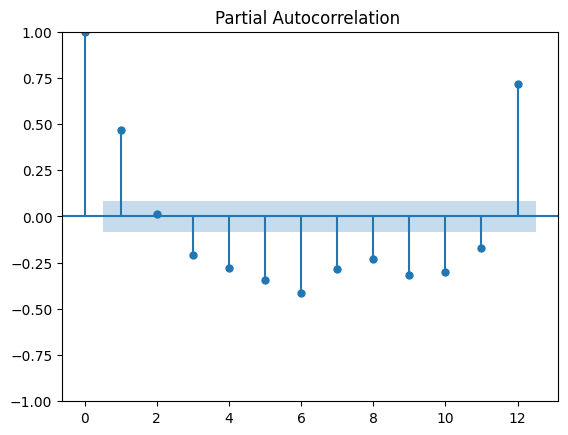

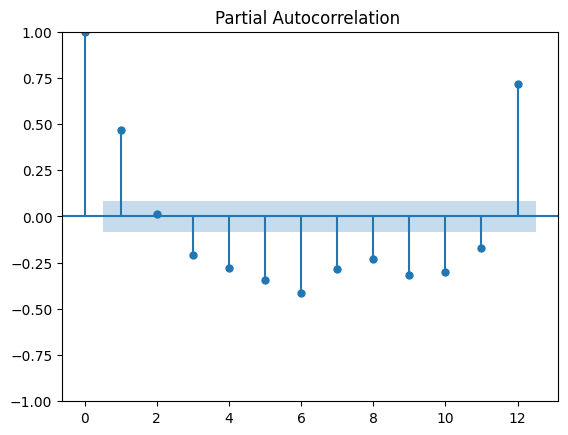

In [ ]:
plot_pacf(first_diff, lags=12, title='Partial Autocorrelation ')


# Model

In [ ]:
!pip install python-dateutil

In [ ]:
df.head()

,IPN31152N
DATE,
1972-01-01,60.0
1972-02-01,67.1
1972-03-01,74.2
1972-04-01,78.1
1972-05-01,84.8


In [ ]:
df.tail()

,IPN31152N
DATE,
2019-09-01,100.2
2019-10-01,90.2
2019-11-01,79.7
2019-12-01,75.7
2020-01-01,83.6


In [ ]:
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

train_end = datetime(2010,1,1)
test_end = datetime(2020,1,1)

train_data = first_diff[:train_end]
# Use relativedelta to add 1 month to train_end
test_data = first_diff[train_end + relativedelta(months=1):test_end]

In [ ]:
# define model
model = ARIMA(train_data, order=(7,0,7))

In [ ]:
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

Model Fitting Time: 10.00734829902649


In [ ]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [ ]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data['IPN31152N'] - predictions

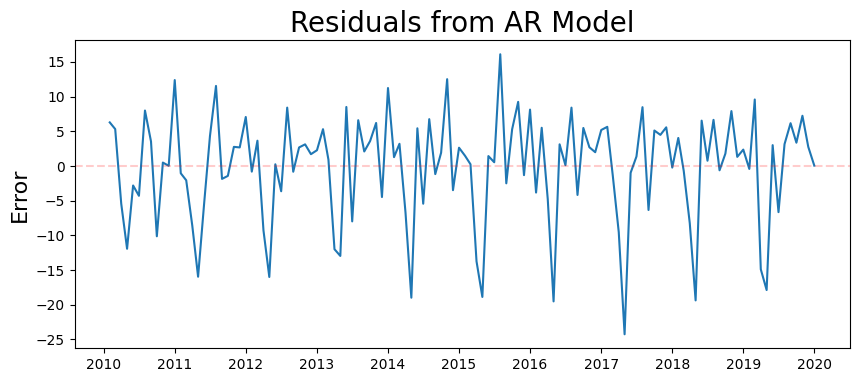

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

**p=1 , q=2**

Text(0, 0.5, 'Sales')

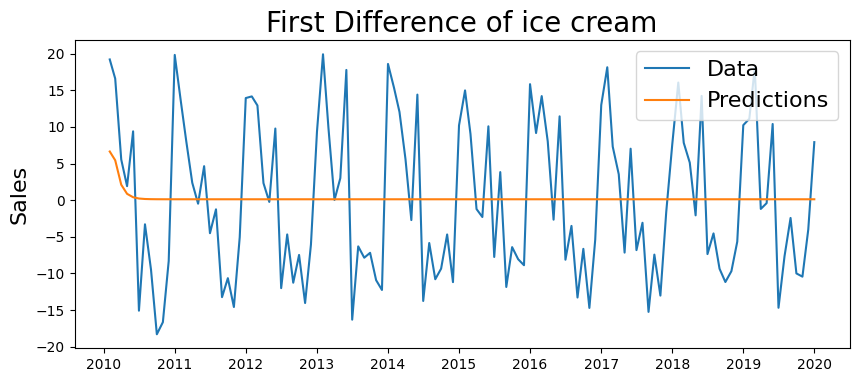

In [ ]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('First Difference of ice cream', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [ ]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 10.270361881665522


**p=2 ; q=1**

Text(0, 0.5, 'Sales')

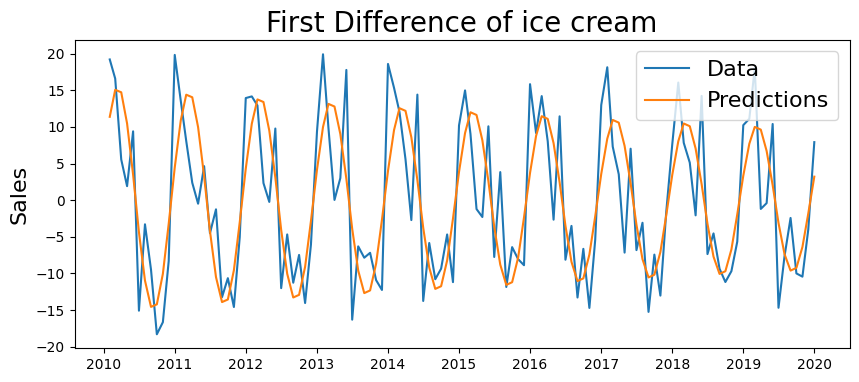

In [ ]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('First Difference of ice cream', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [ ]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 7.110841403837235


**p=2 , q=10**

Text(0, 0.5, 'Sales')

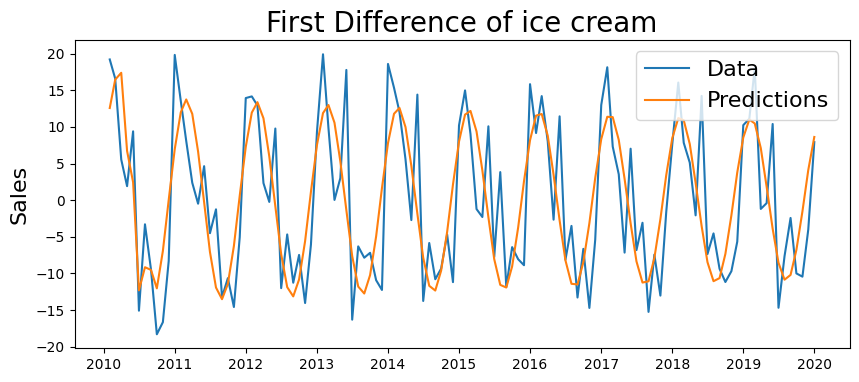

In [ ]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('First Difference of ice cream', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [ ]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 7.2201531368076655


**p=5 , q=5**

Text(0, 0.5, 'Sales')

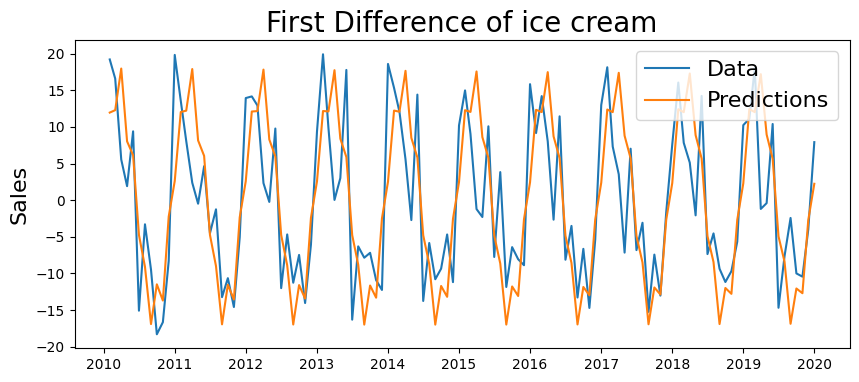

In [ ]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('First Difference of ice cream', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [ ]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 7.724043560052048


**p=7 , q =7**

Text(0, 0.5, 'Sales')

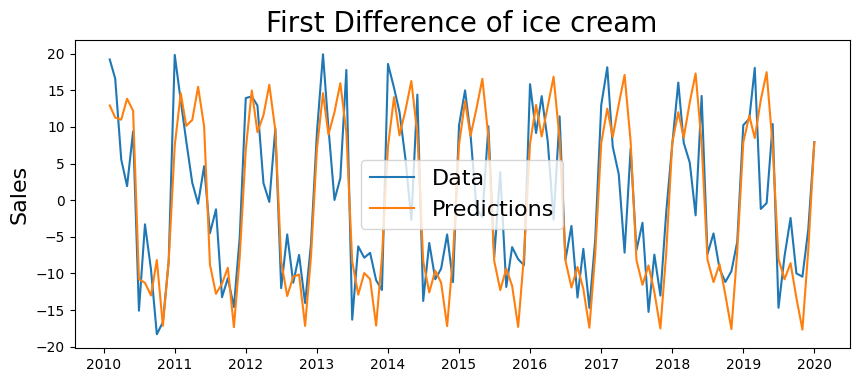

In [ ]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('First Difference of ice cream', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [ ]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 7.647834022398864
